In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

In [24]:
las = lasio.read(r"C:\Users\HAFS\Desktop\Hafs Pyprograms\well log\Dharmatttan\LOGS\Jay 03.LAS")

In [74]:
field_name = las.well.Well.value
print(field_name)

Jay 03


In [25]:
df = las.df()

In [26]:
df.head()

,GR_CED,NEUSS_CED,RESD_CED,RHOB_CED,PHIE,SW,VSH
DEPT,,,,,,,
6650.0,89.141701,0.3266,7.6452,2.1403,0.1018,0.9605,0.4093
6650.5,97.252296,0.3388,7.1759,2.1160,0.0319,0.9494,0.5143
6651.0,107.615700,0.3465,6.8020,2.1150,0.0000,0.9578,0.6898
6651.5,108.418297,0.3505,6.5414,2.1226,0.0000,0.9773,0.7060
6652.0,103.789497,0.3519,6.2849,2.1313,0.0000,0.9999,0.6183


In [27]:
df.reset_index(inplace = True)
df.rename(columns = {"DEPT":"DEPTH", "GR_CED":"GR", "NEUSS_CED":"NEU", "RESD_CED":"RES", "RHOB_CED":"DEN"}, inplace = True)

In [28]:
df.head()

,DEPTH,GR,NEU,RES,DEN,PHIE,SW,VSH
0,6650.0,89.141701,0.3266,7.6452,2.1403,0.1018,0.9605,0.4093
1,6650.5,97.252296,0.3388,7.1759,2.1160,0.0319,0.9494,0.5143
2,6651.0,107.615700,0.3465,6.8020,2.1150,0.0000,0.9578,0.6898
3,6651.5,108.418297,0.3505,6.5414,2.1226,0.0000,0.9773,0.7060
4,6652.0,103.789497,0.3519,6.2849,2.1313,0.0000,0.9999,0.6183


C:\Users\HAFS\AppData\Local\Temp\ipykernel_13184\692411628.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1, 4), (0, 0), rowspan = 1, colspan = 1)


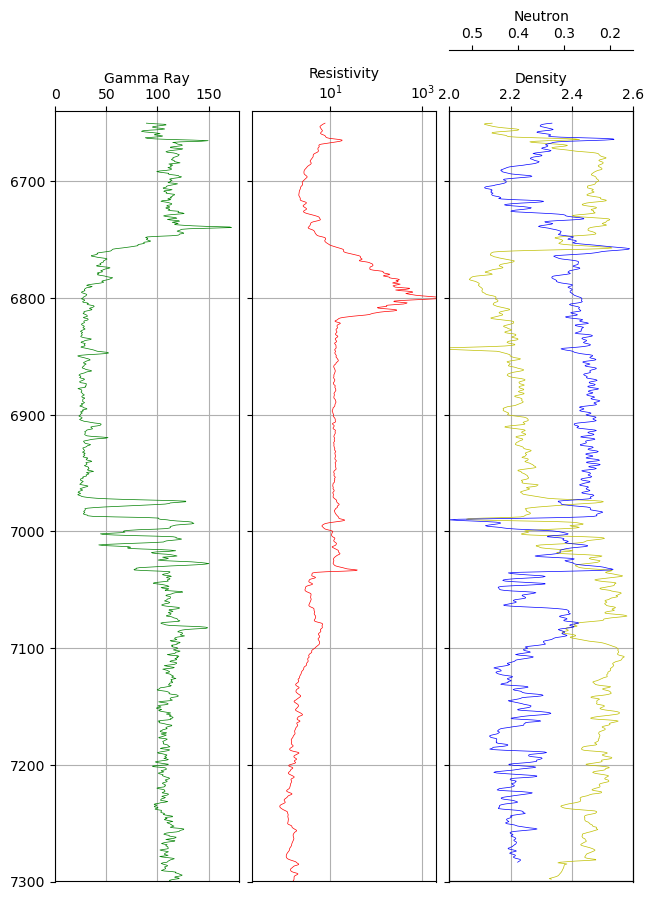

In [66]:
# set the figsize of the axes 
fig, axes = plt.subplots(figsize = (10, 10))
curve_names = ["Gamma Ray", "Resistivity", "Density", "Neutron"] # sets up names of each curve

# set up axes of the subplots/tracks
ax1 = plt.subplot2grid((1, 4), (0, 0), rowspan = 1, colspan = 1)
ax2 = plt.subplot2grid((1, 4), (0, 1), rowspan = 1, colspan = 1)
ax3 = plt.subplot2grid((1, 4), (0, 2), rowspan = 1, colspan = 1)
ax4 = ax3.twiny()

# set up individual plot with corresponding xscale/xlim
ax1.plot("GR", "DEPTH", data = df, color = "g", lw = 0.5)
ax1.set_xlim(0, 180) 

ax2.plot("RES", "DEPTH", data = df, color = "r", lw = 0.5)
ax2.set_xlim(0.2, 2000)
ax2.semilogx() # Resistivity in log scale

ax3.plot("DEN", "DEPTH", data = df, color = "y", lw = 0.5)
ax3.set_xlim(2, 2.6)

ax4.plot("NEU", "DEPTH", data = df, color = "b", lw = 0.5)
ax4.set_xlim(0.55, 0.15) # reverses the scale for twiny with Density log


# set up common elements
for i, ax in enumerate(fig.axes):
    ax.set_ylim(7300, 6640)
    
    # place the xscale on top
    ax.xaxis.set_ticks_position("top") 
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i == 3:
        ax.spines["top"].set_position(("axes", 1.08)) # positions Neutron scale slightly above density
    else:
        ax.grid()
    

# Hide tick labels on y axis in ax2 and ax3    
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)

# add space between each track
fig.subplots_adjust(wspace = 0.07)